<a href="https://colab.research.google.com/github/VahapML/Fundamentals-of-TinyML/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Classifier

In [1]:
# Do not change this code
!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/train.zip \
    -O /tmp/train.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/validation.zip \
    -O /tmp/validation.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/test.zip \
    -O /tmp/test.zip

--2022-01-26 12:51:34--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.132.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>] 137.15M   150MB/s    in 0.9s    

2022-01-26 12:51:35 (150 MB/s) - ‘/tmp/train.zip’ saved [143812152/143812152]

--2022-01-26 12:51:35--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.194.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘/tmp/validation.zip’

/tmp/validation.zip 100%[===

In [2]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# All images will be augmented with the full list of augmentation techniques below

training_data_generator = ImageDataGenerator(rescale=1./255,
                                             #rotation_range=35,
                                             #height_shift_range=0.25,
                                             #width_shift_range=0.25,
                                             #shear_range=0.2,
                                             #zoom_range=0.15,
                                             #horizontal_flip=True,
                                             #fill_mode="nearest"
                                             )


validation_data_generator = ImageDataGenerator(rescale=1./255,
                                               #rotation_range=35,
                                               #height_shift_range=0.25,
                                               #width_shift_range=0.25,
                                               #shear_range=0.2,
                                               #zoom_range=0.15,
                                               #horizontal_flip=True,
                                               #fill_mode="nearest"
                                               )


In [5]:
# Create labelled data to train the network
TRAIN_DIRECTORY_LOCATION = "/tmp/train" # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = "/tmp/validation" # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = "categorical" # YOUR CODE HERE #


train_generator = training_data_generator.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_data_generator.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode=CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    #YOUR CODE HERE#
    # Start with convolutional layers
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(224, 224, 3)),
    # Reduce image size for computation efficiency and feature enhancement
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    # Prevent overfitting
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation="relu"),
    # Prevent overfitting
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(3, activation="softmax")
])

In [8]:
# This will print a summary of your model when you're done!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [9]:
# Compile the model
LOSS_FUNCTION = "categorical_crossentropy"
OPTIMIZER = "adam"

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics= ["accuracy"])

In [10]:
NUMBER_OF_EPOCHS = 20

history = model.fit(train_generator, epochs=NUMBER_OF_EPOCHS,
          verbose=1, validation_data=validation_generator)

Epoch 1/20
9/9 [==============================] - 21s 994ms/step - loss: 1.1441 - accuracy: 0.3433 - val_loss: 1.0921 - val_accuracy: 0.3383
Epoch 2/20
9/9 [==============================] - 8s 918ms/step - loss: 1.0867 - accuracy: 0.3279 - val_loss: 1.0691 - val_accuracy: 0.4662
Epoch 3/20
9/9 [==============================] - 8s 912ms/step - loss: 1.0614 - accuracy: 0.4352 - val_loss: 1.0254 - val_accuracy: 0.4060
Epoch 4/20
9/9 [==============================] - 8s 923ms/step - loss: 0.9451 - accuracy: 0.5068 - val_loss: 0.8272 - val_accuracy: 0.6090
Epoch 5/20
9/9 [==============================] - 8s 1s/step - loss: 1.0208 - accuracy: 0.5164 - val_loss: 0.8255 - val_accuracy: 0.6391
Epoch 6/20
9/9 [==============================] - 8s 917ms/step - loss: 0.8458 - accuracy: 0.6199 - val_loss: 0.7619 - val_accuracy: 0.6842
Epoch 7/20
9/9 [==============================] - 9s 1s/step - loss: 0.8030 - accuracy: 0.6064 - val_loss: 0.7162 - val_accuracy: 0.6617
Epoch 8/20
9/9 [=========

In [11]:
# summarize history for accuracy
import matplotlib.pyplot as plt

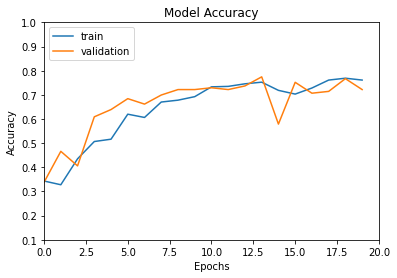

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.xlim([0, NUMBER_OF_EPOCHS])
plt.ylim([0.1, 1])
plt.show()